
# Importing libraries and Reading the data

In [2]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
#import google.colab
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle
import xgboost as xgb

In [3]:
#reading the file to a DataFrame
df_test = pd.read_csv('Test_Data_Set.csv')

# Reviewing the Data

In [4]:
df_test.shape

(5615, 16)

In [5]:
df_test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [6]:
df_test.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating
count,5615.000000,5.487000e+03,5615.000000,5615.000000,5615.000000,5447.000000,5615.00000
mean,13808.000000,9.589009e+04,2010.487622,8.512378,1875.839003,99.474573,5.99537
std,1621.055212,3.088547e+05,4.737177,4.737177,1402.871783,45.483800,1.39901
min,11001.000000,0.000000e+00,1950.000000,3.000000,100.000000,10.000000,4.00000
25%,12404.500000,1.441000e+04,2008.000000,5.000000,1390.000000,73.000000,5.00000
50%,13808.000000,6.400000e+04,2012.000000,7.000000,1798.000000,88.000000,6.00000
75%,15211.500000,1.338490e+05,2014.000000,11.000000,1984.000000,125.000000,7.00000
max,16615.000000,9.143000e+06,2016.000000,69.000000,32000.000000,968.000000,8.00000


Data has some outliers as for some of the features the mean is greater than the median

In [7]:
df_test.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count              object
seat_count              object
fuel_type               object
dtype: object

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5615 non-null   int64  
 1   Maker                5615 non-null   object 
 2   model                5615 non-null   object 
 3   Location             5615 non-null   object 
 4   Distance             5487 non-null   float64
 5   Owner Type           5615 non-null   object 
 6   manufacture_year     5615 non-null   int64  
 7   Age of car           5615 non-null   int64  
 8   engine_displacement  5615 non-null   int64  
 9   engine_power         5447 non-null   float64
 10  body_type            422 non-null    object 
 11  Vroom Audit Rating   5615 non-null   int64  
 12  transmission         5615 non-null   object 
 13  door_count           5615 non-null   object 
 14  seat_count           5615 non-null   object 
 15  fuel_type            5615 non-null   o

In [9]:
#making a copy of the dataset
df_test_copy = df_test.copy()

# Data Cleaning

In [10]:
#removing extra spaces in the columns
df_test.columns = df_test.columns.str.strip()

In [11]:
#checking for duplicates
df_test[df_test.duplicated()].sum()

Id                     0.0
Maker                  0.0
model                  0.0
Location               0.0
Distance               0.0
Owner Type             0.0
manufacture_year       0.0
Age of car             0.0
engine_displacement    0.0
engine_power           0.0
body_type              0.0
Vroom Audit Rating     0.0
transmission           0.0
door_count             0.0
seat_count             0.0
fuel_type              0.0
dtype: float64

In [12]:
#checking for null values
df_test.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [13]:
#dropping columns that don't add value
#ID feature does not help much
#body_type has a lot of missing values, hence dropping it
df_test = df_test.drop(columns=['Id','body_type']) 

In [14]:
df_test.loc[df_test.duplicated()].count()

Maker                  8
model                  8
Location               8
Distance               8
Owner Type             8
manufacture_year       8
Age of car             8
engine_displacement    8
engine_power           6
Vroom Audit Rating     8
transmission           8
door_count             8
seat_count             8
fuel_type              8
dtype: int64

In [15]:
len(df_test[df_test.duplicated()]) 

8

In [16]:
#dropping duplicates while keeping the first occurance of data
df_test.drop_duplicates(keep='first',inplace=True)

In [17]:
#checking for duplicates again
df_test.loc[df_test.duplicated()].count()

Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5607 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5607 non-null   object 
 1   model                5607 non-null   object 
 2   Location             5607 non-null   object 
 3   Distance             5479 non-null   float64
 4   Owner Type           5607 non-null   object 
 5   manufacture_year     5607 non-null   int64  
 6   Age of car           5607 non-null   int64  
 7   engine_displacement  5607 non-null   int64  
 8   engine_power         5441 non-null   float64
 9   Vroom Audit Rating   5607 non-null   int64  
 10  transmission         5607 non-null   object 
 11  door_count           5607 non-null   object 
 12  seat_count           5607 non-null   object 
 13  fuel_type            5607 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 657.1+ KB


In [19]:
#checking the categories column
cat_col = ["Maker", "model", "Location", "Owner Type", "transmission"]
for column in cat_col:
    print(df_test[column].value_counts())
    print("#"*40)

skoda       2251
toyota       848
audi         747
bmw          703
nissan       594
hyundai      260
fiat         199
maserati       5
Name: Maker, dtype: int64
########################################
octavia     1333
superb       341
yaris        340
qashqai      298
x3           282
x1           239
i30          229
q5           209
micra        195
panda        194
avensis      185
x5           182
yeti         180
q3           179
auris        175
coupe        174
rapid        159
aygo         148
roomster     140
q7           123
tt           103
juke         101
citigo        98
Name: model, dtype: int64
########################################
Kochi         538
Bangalore     531
Ahmedabad     527
Delhi         516
Kolkata       516
Mumbai        514
Hyderabad     514
Coimbatore    496
Jaipur        492
Chennai       490
Pune          473
Name: Location, dtype: int64
########################################
First             1486
Third             1413
Fourth & Above    1376
Se

Handling null values

In [20]:
df_test.isnull().sum().sort_values(ascending=False)

engine_power           166
Distance               128
Maker                    0
model                    0
Location                 0
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
Vroom Audit Rating       0
transmission             0
door_count               0
seat_count               0
fuel_type                0
dtype: int64

In [21]:
df_test['seat_count'].replace(to_replace='None', value=np.nan, inplace=True)

In [22]:
df_test['seat_count'].fillna(df_test.seat_count.median(), inplace=True)

In [23]:
df_test['seat_count'] = df_test['seat_count'].astype(int)

In [24]:
df_test['door_count'].replace(to_replace='None', value=np.nan, inplace=True)

In [25]:
df_test['door_count'].fillna(df_test.door_count.median(), inplace=True)

In [26]:
df_test['door_count'] = df_test['door_count'].astype(int)

In [27]:
df_test['Distance'].fillna(df_test.seat_count.median(), inplace=True)

In [28]:
df_test['engine_power'].replace(to_replace='', value=np.nan, inplace=True)

In [29]:
imputer = KNNImputer(n_neighbors=1)
df_test.loc[:,['engine_power']] = imputer.fit_transform(df_test.loc[:,['engine_power']])

In [30]:
df_test['transmission'].unique()

array(['man', 'auto'], dtype=object)

In [31]:
df_test['transmission'].replace(to_replace=' ', value='', inplace=True)

In [32]:
df_test['fuel_type'].unique()

array(['petrol', 'diesel'], dtype=object)

In [33]:
df_test['fuel_type'].replace(to_replace=' ', value='', inplace=True)

In [34]:
df_test.isnull().sum().sort_values(ascending=False)

Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5607 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5607 non-null   object 
 1   model                5607 non-null   object 
 2   Location             5607 non-null   object 
 3   Distance             5607 non-null   float64
 4   Owner Type           5607 non-null   object 
 5   manufacture_year     5607 non-null   int64  
 6   Age of car           5607 non-null   int64  
 7   engine_displacement  5607 non-null   int64  
 8   engine_power         5607 non-null   float64
 9   Vroom Audit Rating   5607 non-null   int64  
 10  transmission         5607 non-null   object 
 11  door_count           5607 non-null   int64  
 12  seat_count           5607 non-null   int64  
 13  fuel_type            5607 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 657.1+ KB


Converting categorical to numerical data

In [36]:
df_test['Location'].unique()

array(['Mumbai', 'Coimbatore', 'Delhi', 'Chennai', 'Bangalore', 'Pune',
       'Jaipur', 'Hyderabad', 'Ahmedabad', 'Kolkata', 'Kochi'],
      dtype=object)

In [37]:
gearDummies = pd.get_dummies(df_test['Location'])
df_test = df_test.join(gearDummies)
df_test = df_test.drop('Location', axis=1)

In [38]:
gearDummies1 = pd.get_dummies(df_test['Owner Type'])
df_test = df_test.join(gearDummies1)
df_test = df_test.drop('Owner Type', axis=1)

In [39]:
gearDummies2 = pd.get_dummies(df_test['transmission'])
df_test = df_test.join(gearDummies2)
df_test = df_test.drop('transmission', axis=1)

In [40]:
gearDummies3 = pd.get_dummies(df_test['fuel_type'])
df_test = df_test.join(gearDummies3)
df_test = df_test.drop('fuel_type', axis=1)

In [41]:
df_test.head()

,Maker,model,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,...,Mumbai,Pune,First,Fourth & Above,Second,Third,auto,man,diesel,petrol
0,skoda,octavia,150000.0,2007,12,1595,75.0,5,4,5,...,1,0,1,0,0,0,0,1,0,1
1,skoda,rapid,29376.0,2014,5,1598,77.0,4,4,5,...,0,0,0,0,0,1,0,1,1,0
2,skoda,octavia,30563.0,2014,5,1968,110.0,5,5,5,...,0,0,0,0,1,0,0,1,1,0
3,audi,q3,8650.0,2015,4,1968,110.0,8,4,5,...,0,0,0,1,0,0,1,0,1,0
4,audi,tt,6400.0,2015,4,1984,169.0,4,2,5,...,0,0,0,0,0,1,1,0,0,1


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5607 entries, 0 to 5614
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5607 non-null   object 
 1   model                5607 non-null   object 
 2   Distance             5607 non-null   float64
 3   manufacture_year     5607 non-null   int64  
 4   Age of car           5607 non-null   int64  
 5   engine_displacement  5607 non-null   int64  
 6   engine_power         5607 non-null   float64
 7   Vroom Audit Rating   5607 non-null   int64  
 8   door_count           5607 non-null   int64  
 9   seat_count           5607 non-null   int64  
 10  Ahmedabad            5607 non-null   uint8  
 11  Bangalore            5607 non-null   uint8  
 12  Chennai              5607 non-null   uint8  
 13  Coimbatore           5607 non-null   uint8  
 14  Delhi                5607 non-null   uint8  
 15  Hyderabad            5607 non-null   u

## EDA

Univariate Analysis

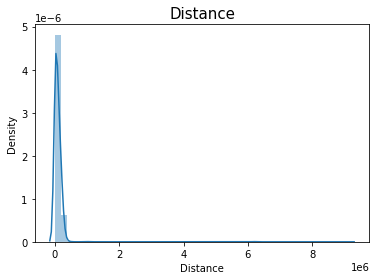

In [43]:
sns.distplot(df_test['Distance'])
plt.title('Distance',fontsize=15)
plt.show()

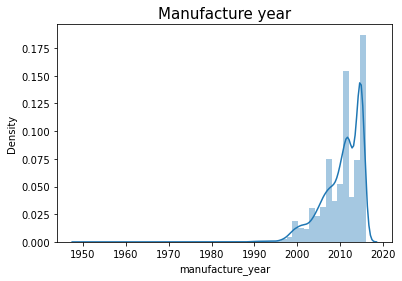

In [44]:
sns.distplot(df_test['manufacture_year'])
plt.title('Manufacture year',fontsize=15)
plt.show()

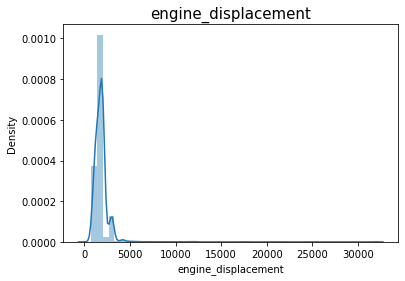

In [45]:
sns.distplot(df_test['engine_displacement'])
plt.title('engine_displacement',fontsize=15)
plt.show()

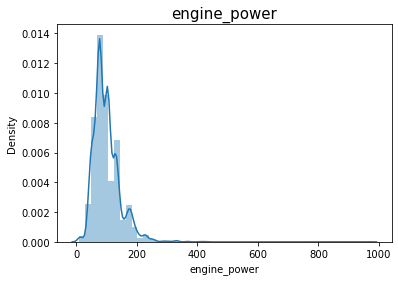

In [46]:
sns.distplot(df_test['engine_power'])
plt.title('engine_power',fontsize=15)
plt.show()

In [47]:
#checking for skewness in data
df_test.skew()

Distance               21.278738
manufacture_year       -2.151151
Age of car              2.151151
engine_displacement    13.080759
engine_power            2.707088
Vroom Audit Rating      0.005124
door_count             -1.506032
seat_count             -2.069104
Ahmedabad               2.783407
Bangalore               2.769122
Chennai                 2.922873
Coimbatore              2.899307
Delhi                   2.823455
Hyderabad               2.830860
Jaipur                  2.914974
Kochi                   2.744467
Kolkata                 2.823455
Mumbai                  2.830860
Pune                    2.991829
First                   1.065090
Fourth & Above          1.183564
Second                  1.233634
Third                   1.142699
auto                    0.838308
man                    -0.838308
diesel                 -0.052467
petrol                  0.052467
dtype: float64

Multivariate Analysis

In [48]:
corr = df_test.corr()
corr

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Ahmedabad,Bangalore,...,Mumbai,Pune,First,Fourth & Above,Second,Third,auto,man,diesel,petrol
Distance,1.000000,-0.198638,0.198638,0.159354,-0.000662,0.025487,0.020991,0.017196,0.007857,0.001913,...,0.017721,-0.016740,0.002101,-0.012923,0.011337,-0.000440,-0.038100,0.038100,0.005538,-0.005538
manufacture_year,-0.198638,1.000000,-1.000000,-0.078853,0.059866,-0.002595,0.119554,0.060439,-0.001910,-0.005237,...,-0.005416,-0.009711,-0.020596,0.013270,-0.009555,0.017150,0.121654,-0.121654,0.131564,-0.131564
Age of car,0.198638,-1.000000,1.000000,0.078853,-0.059866,0.002595,-0.119554,-0.060439,0.001910,0.005237,...,0.005416,0.009711,0.020596,-0.013270,0.009555,-0.017150,-0.121654,0.121654,-0.131564,0.131564
engine_displacement,0.159354,-0.078853,0.078853,1.000000,0.319082,0.009213,0.016617,0.079617,-0.016607,0.014967,...,0.018423,-0.019720,0.002621,0.016295,-0.001761,-0.017088,0.191113,-0.191113,0.145378,-0.145378
engine_power,-0.000662,0.059866,-0.059866,0.319082,1.000000,0.006572,-0.074033,0.050223,-0.018230,0.032736,...,0.009237,-0.016720,-0.007126,-0.002553,0.003367,0.006474,0.490853,-0.490853,0.297937,-0.297937
Vroom Audit Rating,0.025487,-0.002595,0.002595,0.009213,0.006572,1.000000,0.011510,0.011064,-0.010730,0.025458,...,0.019170,-0.023768,0.008924,-0.013221,0.003049,0.001043,0.024325,-0.024325,-0.002719,0.002719
door_count,0.020991,0.119554,-0.119554,0.016617,-0.074033,0.011510,1.000000,0.428640,0.021674,0.013491,...,0.016165,0.005526,-0.019552,-0.005241,-0.002059,0.027088,-0.023708,0.023708,0.244492,-0.244492
seat_count,0.017196,0.060439,-0.060439,0.079617,0.050223,0.011064,0.428640,1.000000,0.009694,0.039830,...,0.008283,0.003620,-0.003016,-0.014148,-0.003080,0.020108,0.107801,-0.107801,0.239554,-0.239554
Ahmedabad,0.007857,-0.001910,0.001910,-0.016607,-0.018230,-0.010730,0.021674,0.009694,1.000000,-0.104174,...,-0.102322,-0.097763,0.030924,-0.003309,0.005465,-0.033513,-0.002203,0.002203,-0.005390,0.005390
Bangalore,0.001913,-0.005237,0.005237,0.014967,0.032736,0.025458,0.013491,0.039830,-0.104174,1.000000,...,-0.102750,-0.098172,-0.003766,0.020791,-0.018812,0.001662,0.009392,-0.009392,0.018937,-0.018937


<AxesSubplot:>

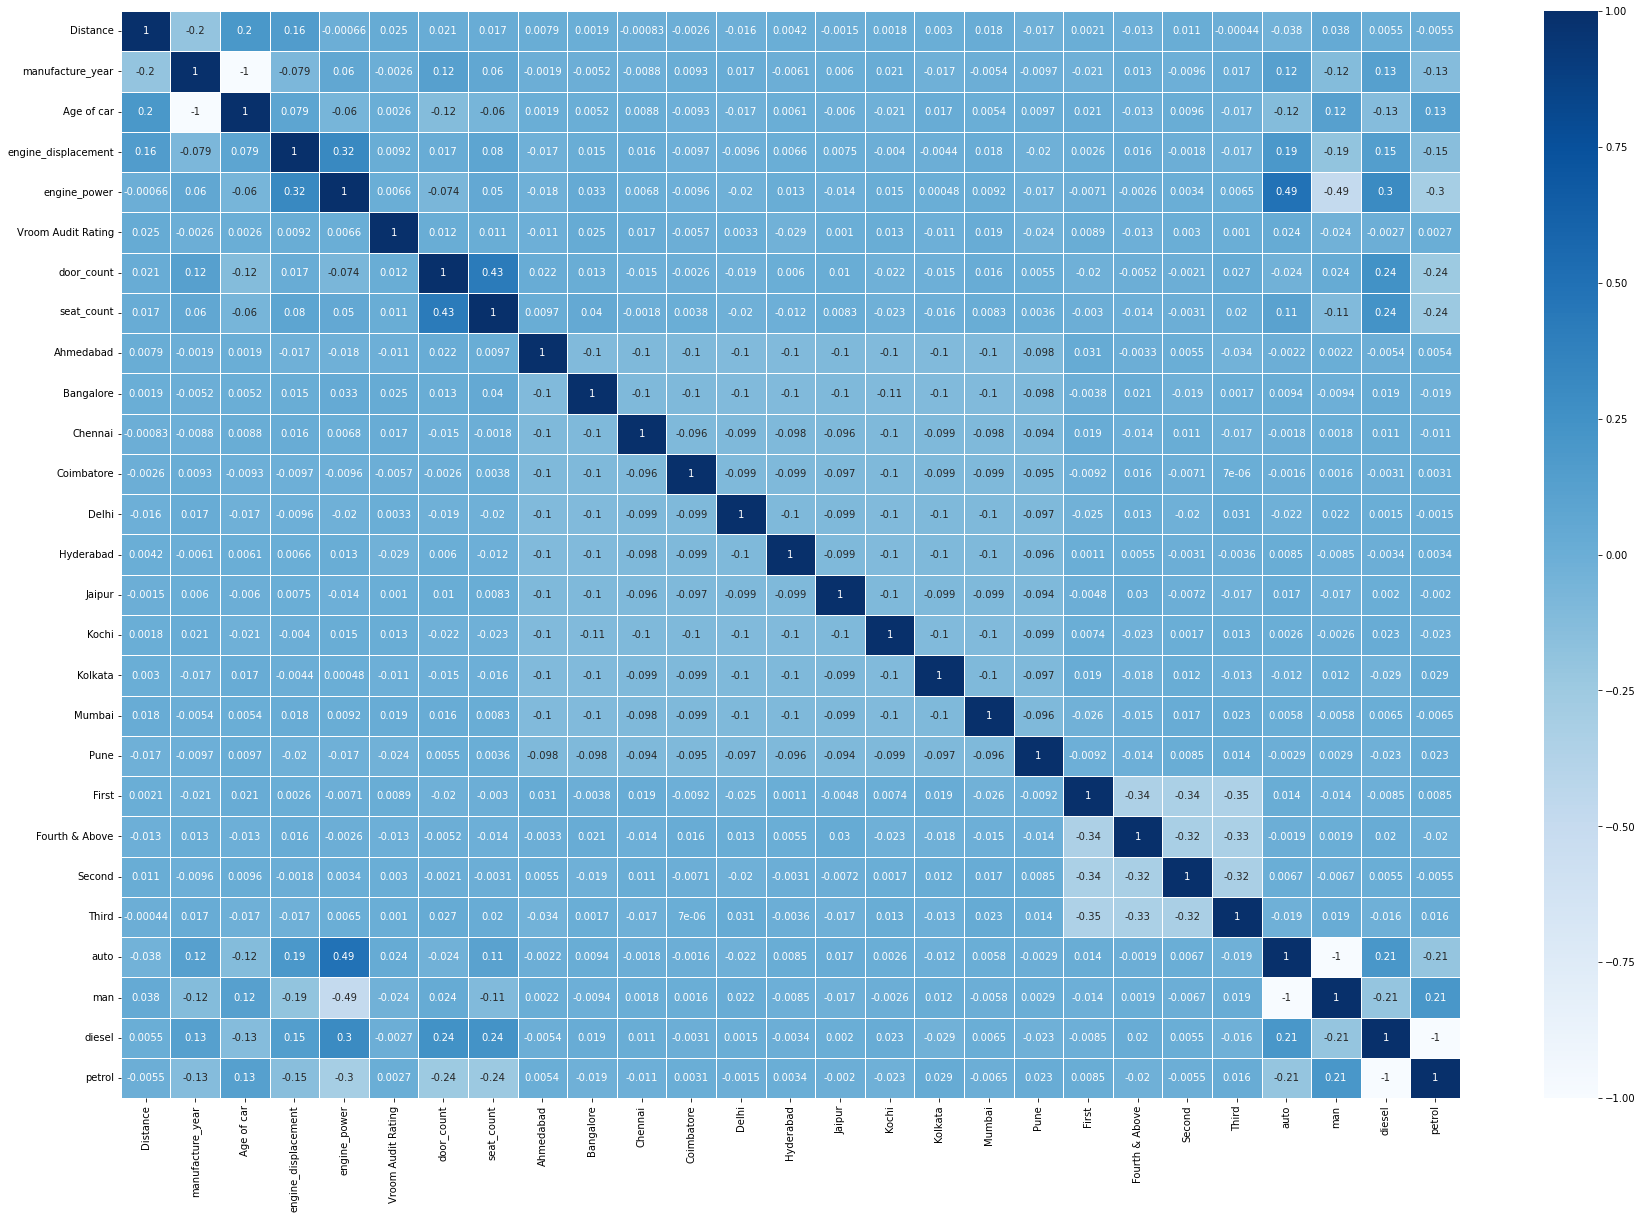

In [49]:
fig, ax = plt.subplots(figsize=(30,20))  
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='Blues', vmax=1.0, vmin=-1.0)

# Dealing with Outliers

In [50]:
#creating a copy of only numerical features
df_num = df_test.select_dtypes(include=np.number)
df_num.head(10)

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Ahmedabad,Bangalore,...,Mumbai,Pune,First,Fourth & Above,Second,Third,auto,man,diesel,petrol
0,150000.0,2007,12,1595,75.0,5,4,5,0,0,...,1,0,1,0,0,0,0,1,0,1
1,29376.0,2014,5,1598,77.0,4,4,5,0,0,...,0,0,0,0,0,1,0,1,1,0
2,30563.0,2014,5,1968,110.0,5,5,5,0,0,...,0,0,0,0,1,0,0,1,1,0
3,8650.0,2015,4,1968,110.0,8,4,5,0,0,...,0,0,0,1,0,0,1,0,1,0
4,6400.0,2015,4,1984,169.0,4,2,5,0,0,...,0,0,0,0,0,1,1,0,0,1
5,3000.0,2015,4,1968,135.0,8,2,2,0,0,...,0,0,0,0,0,1,0,1,1,0
6,10.0,2015,4,2979,20.0,5,4,5,0,0,...,0,0,0,1,0,0,1,0,0,1
7,18000.0,2014,5,1968,130.0,6,4,5,0,1,...,0,0,0,0,0,1,1,0,1,0
8,270.0,2006,13,2000,103.0,5,4,5,0,1,...,0,0,0,1,0,0,0,1,0,1
9,3000.0,2015,4,1197,85.0,5,4,5,0,0,...,0,0,0,0,0,1,0,1,0,1


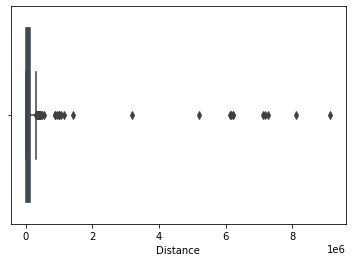

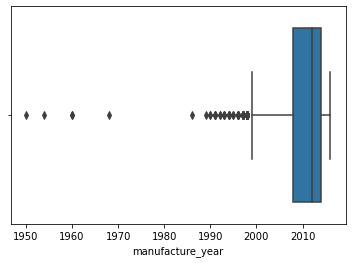

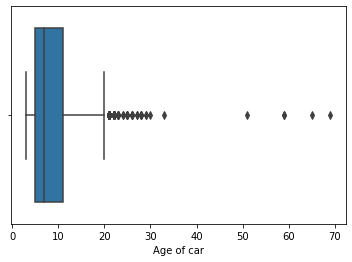

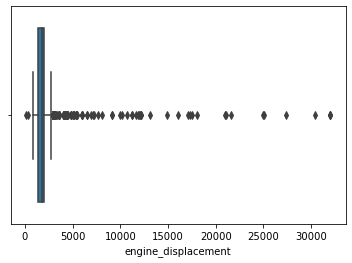

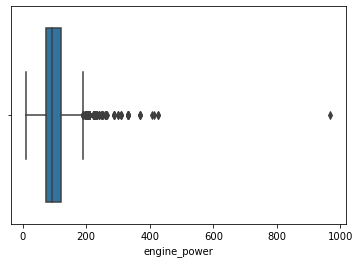

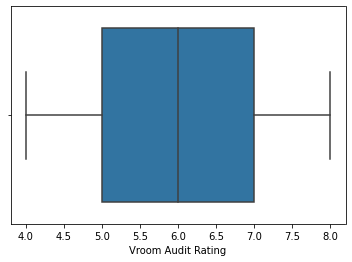

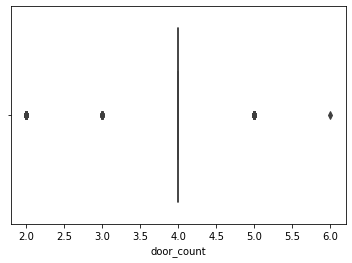

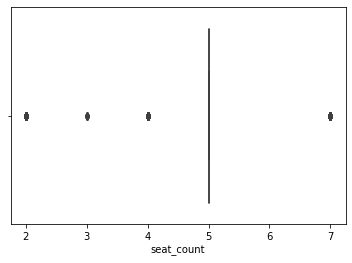

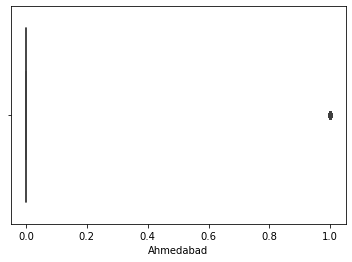

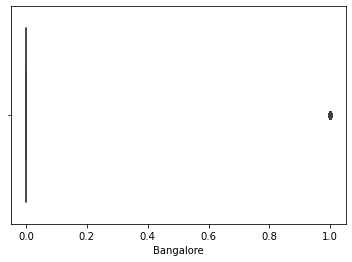

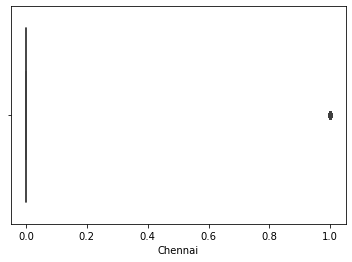

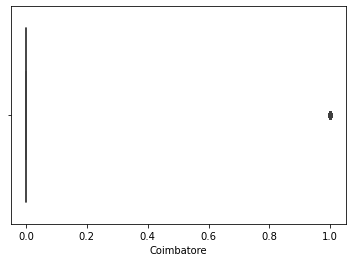

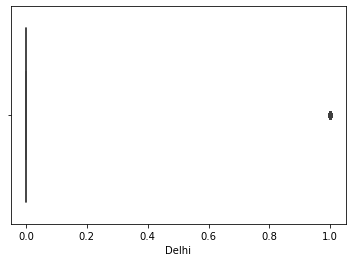

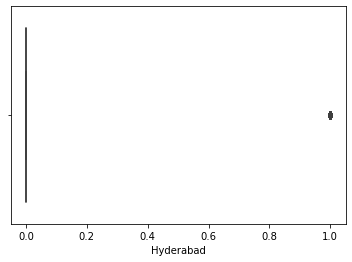

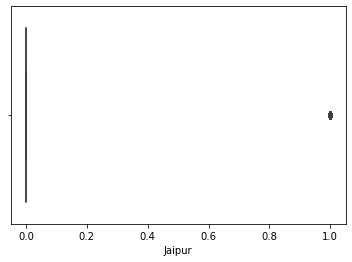

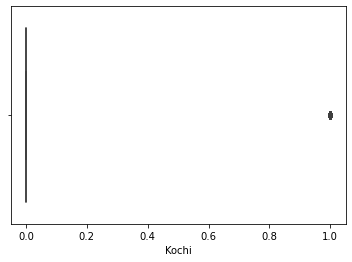

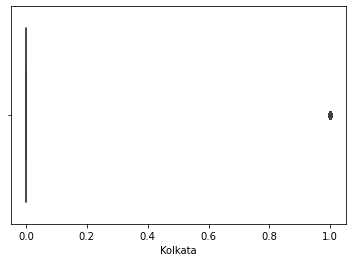

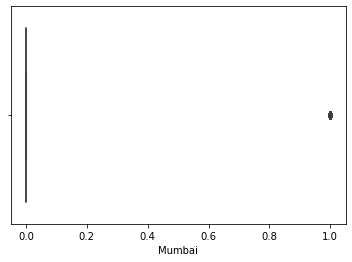

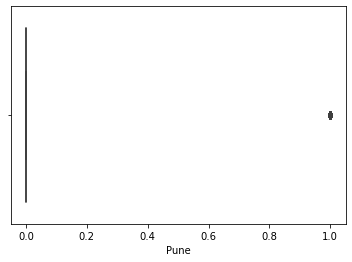

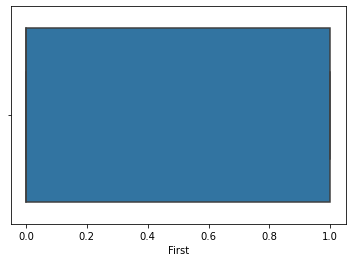

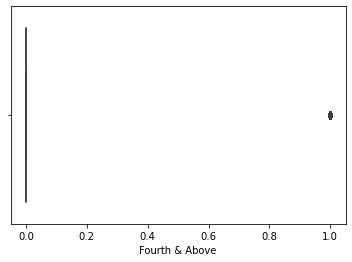

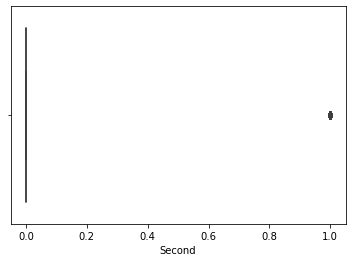

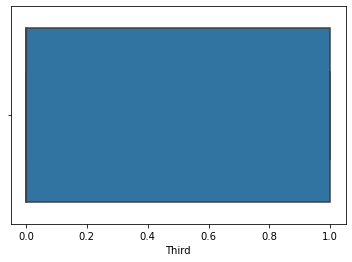

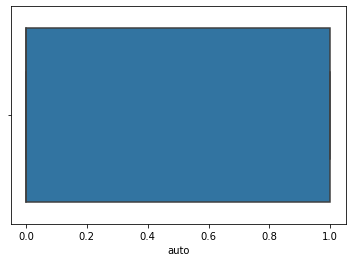

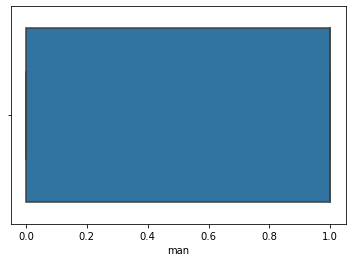

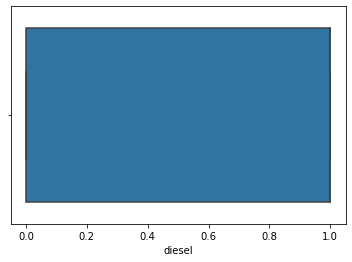

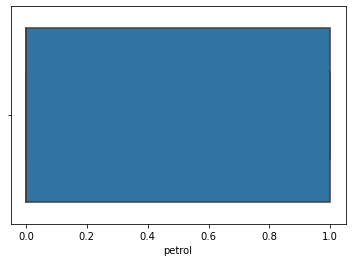

In [51]:
for i in df_num:
    sns.boxplot(df_num[i])
    plt.show()

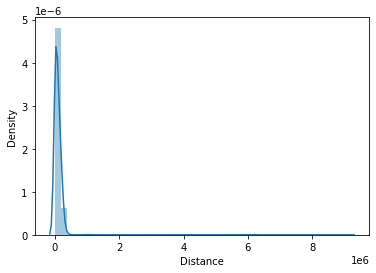

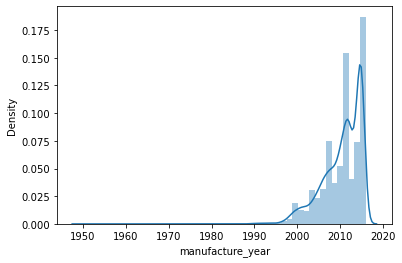

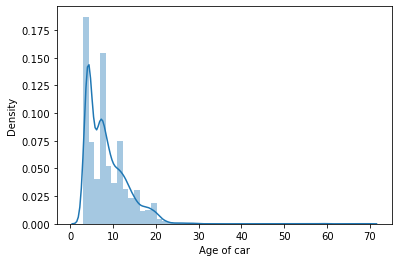

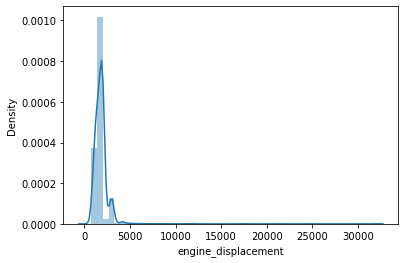

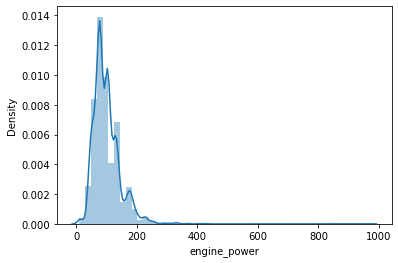

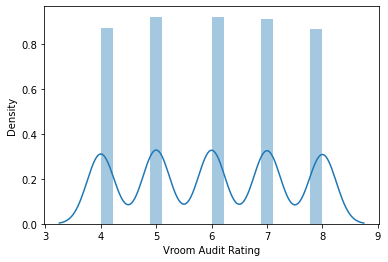

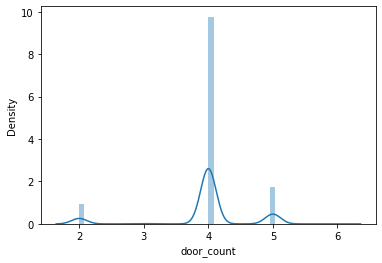

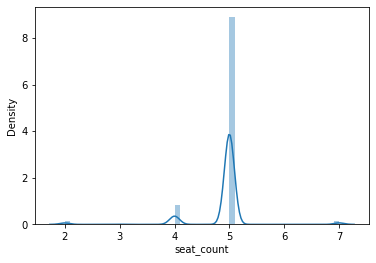

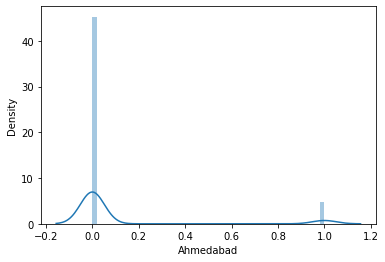

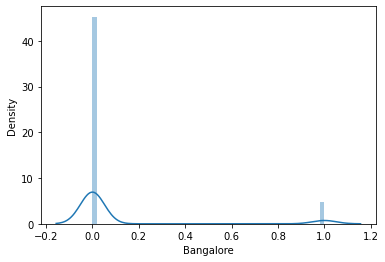

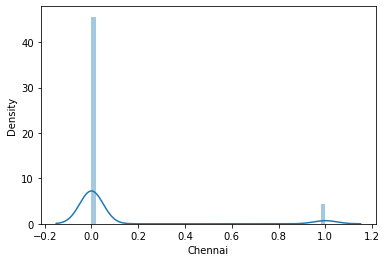

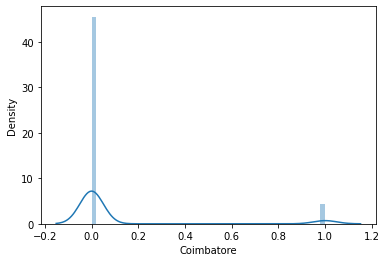

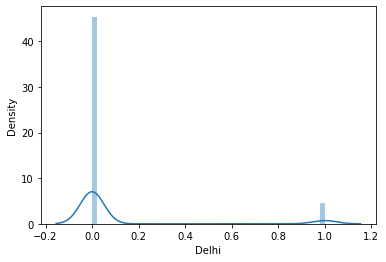

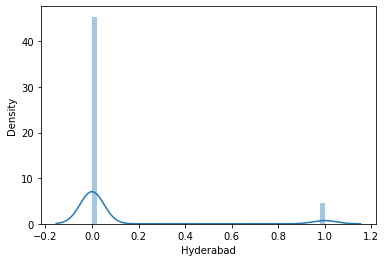

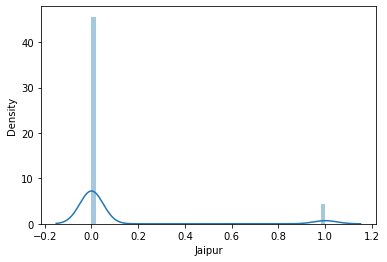

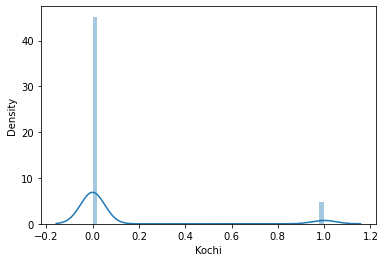

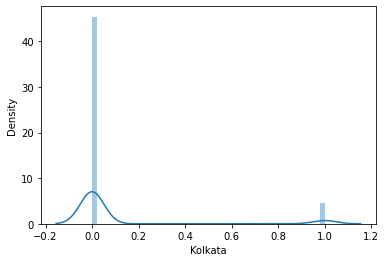

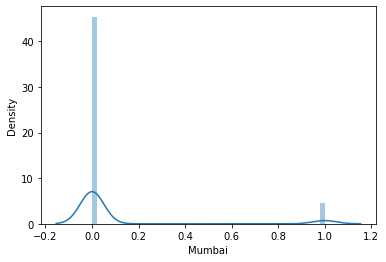

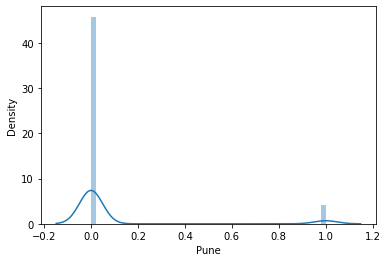

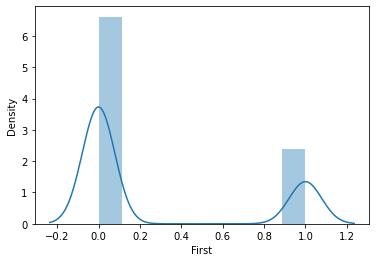

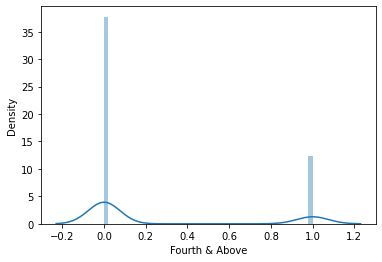

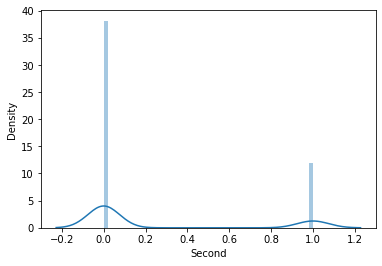

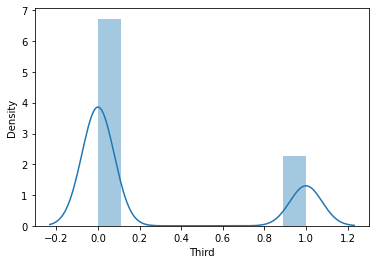

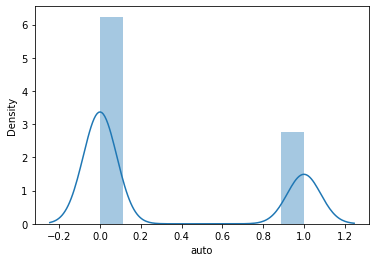

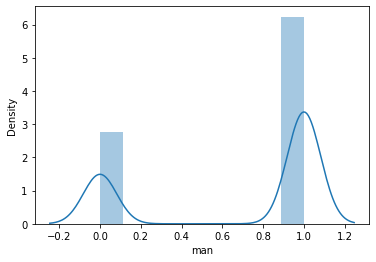

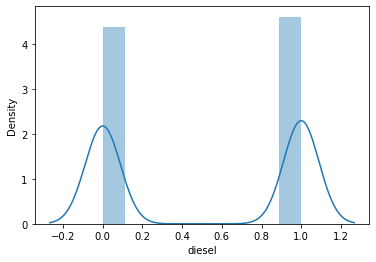

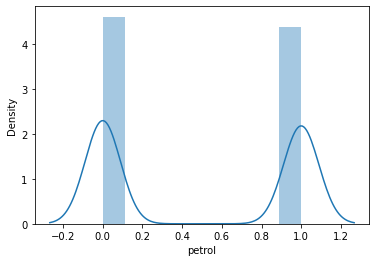

In [52]:
for i in df_num:
    sns.distplot(df_num[i])
    plt.show()

In [53]:
df_num.skew()

Distance               21.278738
manufacture_year       -2.151151
Age of car              2.151151
engine_displacement    13.080759
engine_power            2.707088
Vroom Audit Rating      0.005124
door_count             -1.506032
seat_count             -2.069104
Ahmedabad               2.783407
Bangalore               2.769122
Chennai                 2.922873
Coimbatore              2.899307
Delhi                   2.823455
Hyderabad               2.830860
Jaipur                  2.914974
Kochi                   2.744467
Kolkata                 2.823455
Mumbai                  2.830860
Pune                    2.991829
First                   1.065090
Fourth & Above          1.183564
Second                  1.233634
Third                   1.142699
auto                    0.838308
man                    -0.838308
diesel                 -0.052467
petrol                  0.052467
dtype: float64

Applying Capping technique

In [54]:
## Calculate IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1

ll = Q1-(1.5*IQR)
UL = Q3+(1.5*IQR)

In [55]:
# Replace every outlier on the lower side by the lower whisker
df_num = pd.DataFrame(np.where(df_num>UL,UL,df_num),columns=df_num.columns)

# Replace every outlier on the upper side by the upper whisker 
df_num = pd.DataFrame(np.where(df_num<ll,ll,df_num),columns=df_num.columns)

<AxesSubplot:>

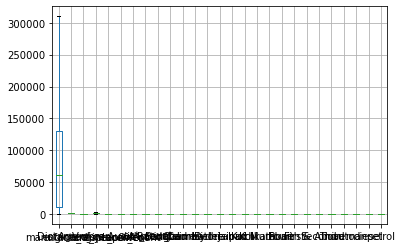

In [56]:
df_num.boxplot()

In [57]:
df_num.shape

(5607, 27)

In [58]:
df_num.skew()

Distance               0.890734
manufacture_year      -0.944339
Age of car             0.944339
engine_displacement    0.612976
engine_power           0.720882
Vroom Audit Rating     0.005124
door_count             0.000000
seat_count             0.000000
Ahmedabad              0.000000
Bangalore              0.000000
Chennai                0.000000
Coimbatore             0.000000
Delhi                  0.000000
Hyderabad              0.000000
Jaipur                 0.000000
Kochi                  0.000000
Kolkata                0.000000
Mumbai                 0.000000
Pune                   0.000000
First                  1.065090
Fourth & Above         0.000000
Second                 0.000000
Third                  1.142699
auto                   0.838308
man                   -0.838308
diesel                -0.052467
petrol                 0.052467
dtype: float64


As you can see, we have successfully dealt with the skewness inherently dealing with outliers

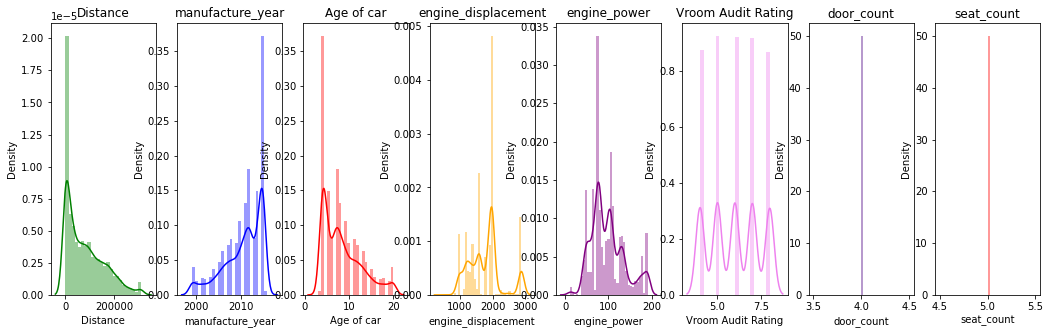

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(1, 9, 1)
plt.title('Distance')
sns.distplot(df_num['Distance'],color='green')
plt.subplot(1, 9, 2)
plt.title('manufacture_year')
sns.distplot(df_num['manufacture_year'],color='blue')
plt.subplot(1, 9, 3)
plt.title('Age of car')
sns.distplot(df_num['Age of car'],color='red')
plt.subplot(1, 9, 4)
plt.title('engine_displacement')
sns.distplot(df_num['engine_displacement'],color='orange')
plt.subplot(1, 9, 5)
plt.title('engine_power')
sns.distplot(df_num['engine_power'],color='purple')
plt.subplot(1, 9, 6)
plt.title('Vroom Audit Rating')
sns.distplot(df_num['Vroom Audit Rating'],color='violet')
plt.subplot(1, 9, 7)
plt.title('door_count')
sns.distplot(df_num['door_count'],color='indigo')
plt.subplot(1, 9, 8)
plt.title('seat_count')
sns.distplot(df_num['seat_count'],color='red')
plt.show()

# Feature Scaling

In [60]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5607 entries, 0 to 5606
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance             5607 non-null   float64
 1   manufacture_year     5607 non-null   float64
 2   Age of car           5607 non-null   float64
 3   engine_displacement  5607 non-null   float64
 4   engine_power         5607 non-null   float64
 5   Vroom Audit Rating   5607 non-null   float64
 6   door_count           5607 non-null   float64
 7   seat_count           5607 non-null   float64
 8   Ahmedabad            5607 non-null   float64
 9   Bangalore            5607 non-null   float64
 10  Chennai              5607 non-null   float64
 11  Coimbatore           5607 non-null   float64
 12  Delhi                5607 non-null   float64
 13  Hyderabad            5607 non-null   float64
 14  Jaipur               5607 non-null   float64
 15  Kochi                5607 non-null   f

In [68]:
X = df_num.iloc[:, 0:8].values

In [69]:
X.shape

(5607, 8)

In [70]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = sc.transform(X)

In [71]:
X.shape

(5607, 8)

# Applying the model to predict the values

In [72]:
model_RFR = pickle.load(open('RFR_final.sav','rb'))

In [73]:
model_XGB = pickle.load(open('XGB_final.sav','rb'))

In [74]:
y_pred_RFR = model_RFR.predict(X)

In [75]:
y_pred_XGB = model_XGB.predict(X)

In [76]:
avg_pred_final = (y_pred_XGB+y_pred_RFR)/2.0

In [77]:
avg_pred_final

array([1084207.5326875, 1084207.5326875, 1084207.5326875, ...,
       1084207.5326875, 1084207.5326875, 1084207.5326875])

In [78]:
y_pred_RFR

array([1129416.440375, 1129416.440375, 1129416.440375, ...,
       1129416.440375, 1129416.440375, 1129416.440375])

In [79]:
y_pred_XGB

array([1038998.6, 1038998.6, 1038998.6, ..., 1038998.6, 1038998.6,
       1038998.6], dtype=float32)

In [ ]:
dfc = pd.read_csv('Test_Data_Set.csv')
final_ids = dfc_1.pop("Id")


In [ ]:
y_pred_XGB
s1 = pd.DataFrame(y_pred_XGB)
final1 = ids.join(s1)
final1.rename(columns={ 0:'Price'}, inplace=True )
final1.to_csv("Hackathon_submission_1.csv", index=False)

In [ ]:
y_pred_RFR
s2 = pd.DataFrame(y_pred_RFR)
final2 = ids.join(s2)
final2.rename(columns={ 0:'Price'}, inplace=True )
final2.to_csv("Hackathon_submission_2.csv", index=False)

In [ ]:
avg_pred_final
s3 = pd.DataFrame(y_pred_RFR)
final3 = ids.join(s3)
final3.rename(columns={ 0:'Price'}, inplace=True )
final3.to_csv("Hackathon_submission_3.csv", index=False)